<a href="https://colab.research.google.com/github/s-ourabh001/Machine-Learning/blob/main/handle_missing_values/lec_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Methods of handling missing values

1- Imputation

2-Dropping

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Placement_Dataset.csv')
print(df.head())
print(df.columns)
print(df.shape)

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 

In [ ]:
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


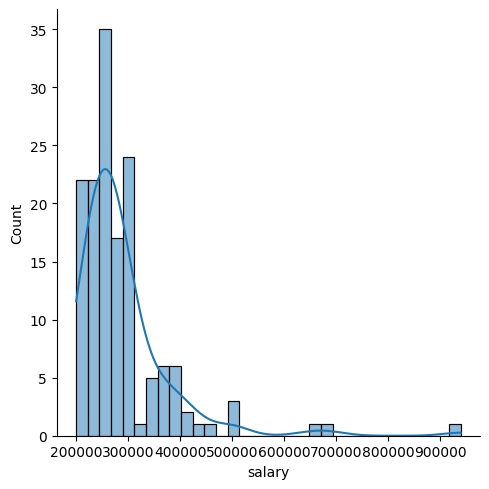

In [ ]:
sns.displot(x='salary',data=df,kde=True)


since there are outliers in  salary field we cannot replace it with mean so try to replace it withh median

In [ ]:
#df['salary']=df['salary'].fillna(df['salary'].median())
#print(df.head)
#df.isnull().sum()


(148, 15)


In [ ]:
#we can also use interpolate method to fill  or  method =ffill or bfill in fillna method

#df['salary']=df['salary'].interpolate();   #interpolate method

#df['salary']=df['salary'].fillna(method='ffill');  #forward or backward fill
#df.isnull().sum()

In [ ]:
#droping method- drop whole column having nan value(bad ) or drop whole row having nan value( better than dropping whole column  but  bad when dataset is small)
print(df.shape)
salary=pd.read_csv('Placement_Dataset.csv')
salary=salary.dropna(axis=0)

print(salary.shape)


(215, 15)
(148, 15)


**DATA STANDARDIZATION:

the process of standardizatiom the data to common format and common range**

✅ What is Standardization in Machine Learning?
Standardization (or Z-score normalization) is a feature scaling technique used to transform the data to have a mean of 0 and a standard deviation of 1.

🔍 Why Use Standardization?
Many machine learning algorithms (like SVM, KNN, Logistic Regression, Neural Networks) perform better when input features are on the same scale.

Without standardization:

Features with larger values can dominate the learning process.

It slows down convergence in algorithms like gradient descent.

📐 The Formula
For each feature
𝑥
x:

𝑥
standardized
=
𝑥
−
𝜇
𝜎
x
standardized
​
 =
σ
x−μ
​

Where:

𝜇
μ = mean of the feature

𝜎
σ = standard deviation of the feature

✅ Example
Assume a feature (like income) has values:

csharp
Copy code
[40,000, 50,000, 60,000, 70,000]
After standardization:

ini
Copy code
[-1.34, -0.45, 0.45, 1.34]  # Now mean is 0, std dev is 1
🧠 When to Use It?
Use standardization when:

Your model is distance-based (e.g., KNN, SVM, clustering)

Your model assumes normality (e.g., Logistic Regression)

You are using gradient-based optimizers

❌ When Not to Use?
Tree-based models like Decision Trees, Random Forest, and XGBoost don’t need standardization — they are invariant to feature scaling.



#####

if data is divided into train and test data
then fit only x_train
and transform x_train,x_test



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.datasets

In [18]:
dataset=sklearn.datasets.load_breast_cancer()
print(type(dataset))
print(dir(dataset))

df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['cancer']=dataset.target
print(df.head())

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.198

In [20]:
y=df['cancer']
x=df.drop(columns='cancer',axis=1);


In [22]:
x_train,x_test,y_tain,y_test=train_test_split(x,y,test_size=0.2,random_state=3)


standardization of data

In [23]:
print(dataset.data.std()) #since std is  not near to one this means data points varies a lot  so need standarization

228.29740508276657


In [24]:
scaler=StandardScaler();
scaler.fit(x_train);

x_train_standarized=scaler.transform(x_train)
print(x_train_standarized)

[[ 1.40381088  1.79283426  1.37960065 ...  1.044121    0.52295995
   0.64990763]
 [ 1.16565505 -0.14461158  1.07121375 ...  0.5940779   0.44153782
  -0.85281516]
 [-0.0307278  -0.77271123 -0.09822185 ... -0.64047556 -0.31161687
  -0.69292805]
 ...
 [ 1.06478904  0.20084323  0.89267396 ...  0.01694621  3.06583565
  -1.29952679]
 [ 1.51308238  2.3170559   1.67987211 ...  1.14728703 -0.16599653
   0.82816016]
 [-0.73678981 -1.02636686 -0.74380549 ... -0.31826862 -0.40713129
  -0.38233653]]


In [25]:
x_test_standarized=scaler.transform(x_test);
x_test_standarized

array([[-0.99455847, -0.05522817, -0.93005495, ..., -0.5697545 ,
         0.02503231, -0.50225186],
       [ 0.10656204,  0.03898678,  0.08315834, ..., -0.32036185,
        -0.70933265, -0.5692316 ],
       [-0.72278064, -0.03348626, -0.73041501, ..., -0.75844367,
         0.17378428, -0.12576093],
       ...,
       [ 0.68654154,  2.15036791,  0.65326834, ...,  0.36531844,
        -1.10548262, -0.37639478],
       [-0.35293864, -1.46362085, -0.41837615, ..., -0.95251542,
        -0.9629939 , -0.86523882],
       [-0.50703947, -1.02153533, -0.56445416, ..., -1.03818808,
        -0.98021781, -1.37352859]])

In [28]:
print(x_train_standarized.std(),x_test_standarized.std())

1.0 0.8654541077212674
